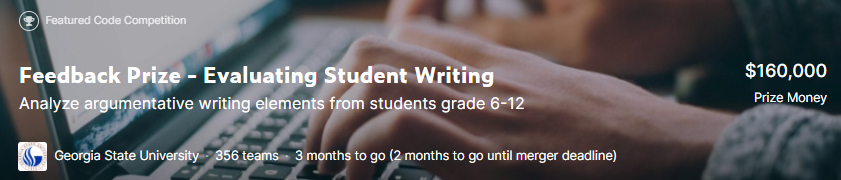

### このコンペティションでは、学生の文章に含まれる要素を特定します。具体的には、6年生から12年生の生徒が書いたエッセイのテキストを自動的に分割し、論証的・修辞的要素を分類します。

### This competition identifies the elements in student writing. Specifically, it will automatically segment the text of essays written by students in grades 6-12 and classify the argumentative and rhetorical elements.

<pre>
December 14, 2021 - Start Date.

March 8, 2022 - Entry Deadline. You must accept the competition rules before this date in order to compete.

March 8, 2022 - Team Merger Deadline. This is the last day participants may join or merge teams.

March 15, 2022 - Final Submission Deadline.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from transformers import *

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Train</span>

In [ ]:
train = pd.read_csv('../input/feedback-prize-2021/train.csv')
train

id-エッセイ応答のIDコード<br>
discourse_id-談話要素のIDコード<br>
discourse_start-エッセイの応答で談話要素が始まる文字の位置<br>
discourse_end-談話要素がエッセイ応答で終了する文字位置<br>
discourse_text-談話要素のテキスト<br>
discourse_type-談話要素の分類<br>
discourse_type_num-談話要素の列挙されたクラスラベル<br>
predictionstring-予測に必要なトレーニングサンプルの単語インデックス

In [ ]:
train.predictionstring[0]

In [ ]:
train.discourse_text[0]

### このdiscourse_typeがsubmittionファイルのclassと紐づいている。7種類ある。

### This discourse_type is associated with the class of the submittion file.

In [ ]:
train.discourse_type.unique()

In [ ]:
train.discourse_type_num.unique()

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Train Folder</span>

In [ ]:
with open('../input/feedback-prize-2021/train/423A1CA112E2.txt', 'r') as f:
    c =f.read()
    print(c)

### Trainフォルダの１ファイル"423A1CA112E2"を読んでみる。
### この１つのファイルに10個のtrainデータが紐づいている。

### Try to read one file "423A1CA112E2" in the Train folder.
### There are 10 train data in this one file.

In [ ]:
train[train.id=='423A1CA112E2']

みにくいので、1行目のpredictionstringだけみてみる。1-44まで昇順にならんでいる。

Since it's hard to see, let's just look at the predictionstring in the first line, which is listed in ascending order from 1-44.

In [ ]:
train.loc[0,'predictionstring']

In [ ]:
train.loc[0,'discourse_text']

読みこんだtextファイルのdiscourse_start=8,discourse_end=229なので、その部分を抽出する。<br>
train.loc[0,'discourse_text']　で抽出した内容と一致していることがわかる。

Since discourse_start = 8, discourse_end = 229 of the read text file, that part is extracted. <br>
It can be seen that it matches the content extracted by train.loc [0,'discourse_text'].

In [ ]:
print(c[8:229])

じゃあ、0-8はなんだったかというと。これになる。

So what was the 0-8? It comes down to this.

In [ ]:
print(c[:8])

### 423A1CA112E2 のデータをおっていきます。

### Follow the data for 423A1CA112E2.

In [ ]:
c = train[train.id=='423A1CA112E2']
c

In [ ]:
c.discourse_type_num

### 順番はlead,Position [Evidence,Claim 繰り返し] ,Concluding Statement　となってます。

### The order is Lead, Position [Evidence, Claim Repetition], Concluding Statement.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Lead</span>

In [ ]:
c.loc[0,'discourse_text']

現代人は常に携帯電話を使っています。1日5時間以上、常に携帯を触っています。やっていることは、メールのやりとりや、ソーシャルメディア上のグループチャットだけです。運転中だってそうです。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Position</span>



In [ ]:
c.loc[1,'discourse_text']

彼らは、携帯電話になると、いろいろなことが起きると、本当に悪い結果になるんだ

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Evidence </span>

In [ ]:
c.loc[2,'discourse_text']

米国では、携帯電話を理由に教室での使用を禁止している地域がある。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Evidence </span>

In [ ]:
c.loc[3,'discourse_text']

人々が携帯電話を持っているとき、彼らは持っている特定のアプリについて知っています。 Facebook Twitter InstagramやSnapchatのようなアプリです。だから、もし友達が遠くに引っ越しても、ビデオやテキストメッセージを投稿することで連絡を取り合うことができるんだ。人々は常に携帯電話で通信する方法とは異なる方法を持っています。携帯電話は、私たちの世代のために変更されています。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Claim </span>

In [ ]:
c.loc[4,'discourse_text']

運転は移動手段の一つです。運転中も携帯をいじっている人が多い。それが深刻な問題を引き起こすことがある

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Evidence </span>

In [ ]:
c.loc[5,'discourse_text']

だから、運転中のメール禁止というのがあるんです。これは本当に大切なことです。それでもやってしまう人がいるのは、それが愚かなことだと思うからです。どんなことをしても、それを守らなければならないのです。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Evidence </span>

In [ ]:
c.loc[6,'discourse_text']

ニュースでは時々、事故か自殺のどちらかがあります。前方不注視や、誰かのツイートが原因かもしれません。怪我か死か。謎の番号から殺すぞと言われ、住所も知られていて、相手の連絡先もわからないとなると、戸惑い、パニックになる。それは本当に悪い結果になる可能性がある

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Claim </span>

In [ ]:
c.loc[7,'discourse_text']

電話は使ってもいいし、助けに来てくれるのも一番いい。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Evidence </span>

In [ ]:
c.loc[8,'discourse_text']

もし、問題が起きて助けが見つからないとき、あなたはいつも電話を持っています。携帯電話はほとんど毎日使っているものですが、安全であれば、トラブルに巻き込まれたときに役に立つでしょう。運転中にこのようなことがないように気をつけましょう。

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Concluding Statement </span>

In [ ]:
c.loc[9,'discourse_text']

スマホが絡んだバカなことをする人がいると、いつもニュースが更新される。一番安全な方法は、安全であることです。

### 参考までに他のidも見てみる

### Let's see some other ids for reference.

In [ ]:
train[train.id=='4C471936CD75']

In [ ]:
c.discourse_type_num

discourse_typeは7種類

In [ ]:
train.discourse_type.unique()

In [ ]:
train.discourse_type.value_counts()

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Test Folder</span>

### testフォルダの１ファイル(0FB0700DAF44)を読んでみる。

### Try to read one file (0FB0700DAF44) in the test folder.

In [ ]:
with open('../input/feedback-prize-2021/test/0FB0700DAF44.txt', 'r') as f:
    c =f.read()
    print(c)

### 提出ファイル。classに前述した7種類のdiscourse_typeを入れる。
### predictionstringは、該当する文字位置をいれる<br>


### Submission file. class should contain the seven discourse_types mentioned above.
### predictionstring is the position of the corresponding character<br>.

In [ ]:
sub = pd.read_csv('../input/feedback-prize-2021/sample_submission.csv')
sub

id - the name of the text segment’s source essay, excluding the “.txt” extension<br>
class - class label of discourse element<br>
predictionstring - word indices of discourse element

-------------------------

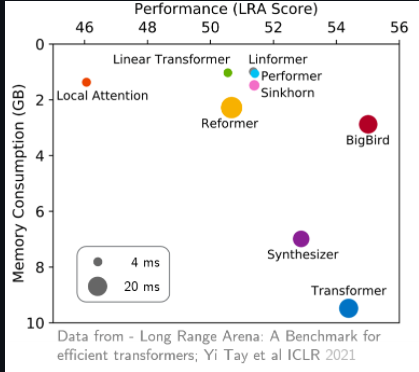

## <font color="orange">  PyTorch BigBird NERって何？</font><br>

自然言語モデルは沢山あり、その中の１つ。
https://torch.classcat.com/category/nlp-2/

Googleの研究者たちが新たに、BigBirdと呼ばれるディープラーニングモデルを開発した。Transformerニューラルネットワークで、これまでよりも最大8倍長いシーケンスを処理することができる。このモデルをベースとしたネットワークが、自然言語処理(NLP)およびゲノミクス処理において、新たに最高のパフォーマンスレベルを達成した。

このモデルと一連の試験については、arXivに発表された論文に説明されている。BigBirdは、Transformerニューラルネットワークの複雑性を軽減し、従来よりも長いシーケンスを使ったトレーニングや推論を可能にする、新しいセルフアテンション(self-attention)モデルである。シーケンス長を最大8倍にまで増加することにより、質問応答やドキュメント要約など、いくつかのNLPタスクにおいて、最高峰のパフォーマンスを新たに実現している。さらに同チームは、BigBirdを使用して、ゲノムシーケンス表現におけるTransformerモデルのアプリケーションを新たに開発することで、従来モデルよりも精度を5パーセント向上することに成功した。

Transformerはシーケンス学習、とりわけNLPの分野では、最も多く選択されるニューラルネットワークアーキテクチャになった。その理由は、再帰型ニューラルネットワークアーキテクチャ(RNN)に対するアドバンテージの存在だ。中でも、シーケンス内の以前の項目を"記憶"可能にするセルフアテンションメカニズムは、シーケンス全体の並列動作を可能にすることで、トレーニングや推論の高速化に寄与している。一方でセルフアテンションは、シーケンス内の各項目が他のすべての項目とリンク(あるいは"attend")する可能性があるため、その演算およびメモリの計算量は、処理される可能性のある最大シーケンス長をnとした場合、O(n^2)となる。このため、現在のハードウェアで処理可能なシーケンス長は、512項目程度が実用上の制限となっている。

BigBirdは、O(n)の計算量を持つ新しいセルフアテンションスキームにより、最大で4,096項目のシーケンス長を可能にする。各項目が他のすべての項目にリンクする代わりに、BigBirdでは、3つの小さなアテンション機構を組み合わせて用いている。最初はランダムアテンションで、ランダムに選択された少数の項目に対して各項目がリンクする。第2のウィンドウアテンションでは、シーケンス内の前後にある一定数の項目に対してリンクする。最後のグローバルアテンションは、他の全項目中、一定のシーケンス距離にある項目をリンクする。

チームが行ったNLP試験では、アテンション機構をBigBirdに置き換えたBERTベースのモデルアーキテクチャを使用して、RoBERTAや、同じくO(n)の計算量を持つ最新のアテンションモデルであるLongformerとパフォーマンスの比較を行った。その結果、BigBirdモデルはNatural Questions、HotpotQA-distractor、TriviaQA-wiki、WikiHopという４つの質問応答データセットで他の2モデルを上回る成績を上げた。いくつかのドキュメント分類データセットを使ったRoBERTAとの比較も行われた。BigBirdは、RoBERTAをパフォーマンスで上回ったのみならず、Arxivデータセットでは、F1スコアで92.31パーセントという、それまでの87.96パーセントというレコードを越える新たな最高スコアをマークしたのだ。NLPタスクと同時に、チームは、BigBirdのシーケンス能力の高さが、ゲノミクスアプリケーションのモデル構築にも使用できることを示してみせている。"プロモータ領域予測(promoter region prediction)"と"クロマチンプロファイル予測(chromatin-profile prediction)"という２つのゲノム分類タスクにおいて、BigBirdは、いくつかのベースラインモデルを凌駕した。前者のタスクでは99.9パーセントの正確性を達成し、過去最高であったモデルを5パーセント上回った。

## <font color="orange">   What is PyTorch BigBird NER?</font><br>

There are many natural language models, and this is one of them.
https://torch.classcat.com/category/nlp-2/

Researchers at Google have developed a new deep learning model called BigBird, a Transformer neural network that can process sequences up to eight times longer than before. Networks based on this model have newly achieved the highest performance levels in natural language processing (NLP) and genomics processing.

BigBird is a new self-attention model that reduces the complexity of the Transformer neural network and allows for training and inference over longer sequences than previously possible. attention) model. By increasing the sequence length by up to eight times, the new model achieves top performance in several NLP tasks, such as question answering and document summarization. In addition, the team used BigBird to develop a new application of the Transformer model in genome sequence representation, which improved accuracy by 5 percent over the previous model.

Transformer has become the neural network architecture of choice for sequence learning, especially in the field of NLP. The reason for this is its advantage over recurrent neural network architectures (RNNs). Among them, the self-attention mechanism, which allows "remembering" of previous items in a sequence, contributes to faster training and inference by enabling parallel operation of the entire sequence. On the other hand, since each item in a sequence may be linked (or "attended") to all other items, the computational and memory requirements of self-attention are O(n^2), where n is the maximum possible sequence length to be processed. For this reason, the practical limit of the sequence length that can be processed by current hardware is about 512 items.

BigBird enables a sequence length of up to 4,096 items with a new self-attention scheme that has a computational complexity of O(n). Instead of each item being linked to all other items, BigBird uses a combination of three smaller attention mechanisms. The first is random attention, in which each item is linked to a small number of randomly selected items. The second is windowed attention, in which each item is linked to a fixed number of items before and after it in the sequence. The final global attention links items that are within a certain sequence distance of all other items.

In the NLP tests conducted by the team, they used a BERT-based model architecture with the attention mechanism replaced by BigBird and compared its performance with RoBERTA and Longformer, a modern attention model that is also O(n) computationally intensive. The results showed that the BigBird model outperformed the other two models on four question-answering datasets: Natural Questions, HotpotQA-distractor, TriviaQA-wiki, and WikiHop. Not only did BigBird outperform RoBERTA on several document classification datasets, but on the Arxiv dataset, BigBird achieved an F1 score of 92.31 percent, a new high that surpassed the previous score of 87.96 percent. Along with the NLP task, the team has shown that BigBird's sequencing capabilities can also be used to build models for genomics applications." In two genome classification tasks, "promoter region prediction" and "chromatin-profile prediction," BigBird outperformed several In the former task, BigBird outperformed several baseline models. In the former task, it achieved 99.9 percent accuracy, 5 percent better than the best model ever.

Translated with www.DeepL.com/Translator (free version)

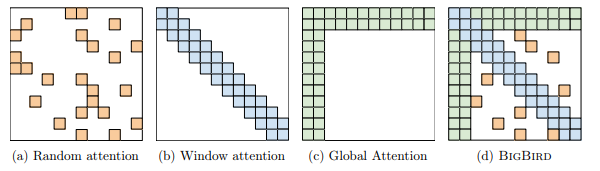

## <font color="orange"> BigBirdの主なハイライト</font><br>

BigBirdの以前のトランスベースモデルよりも優れた機能のいくつかを次に示します。

### <u> スパース注意メカニズム</u>

この主要なオブジェクトを特定することは、人間としては簡単ですが、コンピューターシステムのこのプロセスを合理化することは、NLPでは大きな問題です。このプロセス全体の複雑さを軽減するために、注意メカニズムが導入されました。

BigBirdは、処理を可能にするスパースアテンションメカニズムを使用します

BERTで可能な長さの最大8倍の長さのシーケンス。この結果は、BERTと同じハードウェアを使用して実現できることに注意してください。

BigBirdの前述の論文で、研究者はBigBirdで使用されるスパースアテンションメカニズムが完全なセルフアテンションメカニズム（BERTで使用される）と同じくらい強力であることを示しています。これに加えて、「スパースエンコーダー-デコーダーがチューリング完全である方法」も示しています。


 
簡単に言うと、BigBirdはスパースアテンションメカニズムを使用します。これは、アテンションメカニズムが入力全体に一度だけ適用されるBERTとは異なり、アテンションメカニズムがトークンごとに適用されることを意味します。

### <u> 最大8倍長い入力シーケンスを処理できます</u>
研究者チームは、BERTのような完全な変圧器のすべての要件を満たすようにBigBirdを設計しました。

BigBirdとそのスパースアテンションメカニズムを使用して、研究者チームは（BERTの）O（n²）の複雑さをO（n）だけに減らしました。これは、512トークンに制限されていた入力シーケンスが4096トークン（8 * 512）に増加したことを意味します。

フィリップ・ファム、BIGBIRDを作成した研究者の一人は、で述べているハッカーニュース議論- 「私たちの論文のほとんどは、我々は4096を使用しますが、我々ははるかに大きい16kの+を行くことができます。」

## <font color="orange">BigBird's major highlights</font><br>

Some of the features that make BigBird better than the previous transformer-based model are as follows.

### <u>Sparse attention mechanism</u>.

Identifying this key object is easy for us as humans, but streamlining this process in a computer system is a major problem in NLP. To reduce the complexity of this whole process, attention mechanisms have been introduced.

BigBird uses a sparse attention mechanism that allows processing

sequences up to 8 times longer than possible with BERT. Note that this result can be achieved using the same hardware as BERT.

In the aforementioned paper on BigBird, the researchers show that the sparse attention mechanism used in BigBird is as powerful as the full self-attention mechanism (used in BERT). In addition to this, they also show "how the sparse encoder-decoder is Turing-complete".


 
In a nutshell, BigBird uses a sparse attention mechanism. This means that the attention mechanism is applied on a per-token basis, unlike BERT where the attention mechanism is applied only once to the entire input.

### <u>Up to 8 times longer input sequences can be processed</u>.
The team of researchers designed BigBird to meet all the requirements of a complete transformer like BERT.

Using BigBird and its sparse attention mechanism, the researcher team reduced the O(n²) complexity (of BERT) to only O(n). This meant that the input sequence, which was limited to 512 tokens, increased to 4096 tokens (8 * 512).

Phillip Pham, one of the researchers who created BIGBIRD, stated in the Hacker News discussion- "Most of our papers, we use 4096, but we can go much larger 16k +."

Translated with www.DeepL.com/Translator (free version)

## <font color="orange"> 環境設定/Environment settings</font><br>

GitHubの情報をもとに作成しましょう。

Let's create it based on the information on GitHub.

https://github.com/google-research/bigbird

## <font color="orange"> Install BigBrid</font><br>

In [ ]:
#%cd /kaggle/working
#!cp ../input/bigbird-install/kaggle/working/bigbird  ./ -r

In [ ]:
#!git clone https://github.com/google-research/bigbird.git
#%cd bigbird
#!pip3 install -e .

Option install

In [ ]:
#!mkdir -p bigbird/ckpt
#!gsutil cp -r gs://bigbird-transformer/ bigbird/ckpt/

## <font color="orange"> 前処理/Pre Process</font><br>

In [ ]:
%cd /kaggle/working/

In [ ]:
os.listdir('../input/feedback-prize-2021/')

### Testフォルダの中身を全部読んで、Pandasのフレームワークにする。

### Read the entire contents of the Test folder and make it a Pandas framework.

In [ ]:
data_names, data_texts = [], []
for f in list(os.listdir('../input/feedback-prize-2021/test')):
    data_names.append(f.replace('.txt', ''))
    data_texts.append(open('../input/feedback-prize-2021/test/' + f, 'r').read())
data_texts = pd.DataFrame({'id': data_names, 'text': data_texts})
data_texts

### Trainフォルダの中身を全部読んで、Pandasのフレームワークにする。

### Read the entire contents of the Train folder and make it a Pandas framework.

In [ ]:
train_names, train_texts = [], []
for f in list(os.listdir('../input/feedback-prize-2021/train')):
    train_names.append(f.replace('.txt', ''))
    train_texts.append(open('../input/feedback-prize-2021/train/' + f, 'r').read())
train_texts = pd.DataFrame({'id': train_names, 'text': train_texts})
train_texts

## <font color="orange"> データクレンジング/Data cleansing</font><br>

### 教科書通りにやっていきます。まずは、データクレンジングです。
### データクレンジングとは､重複や誤記､不要な記号の混入､表記の揺れなどを探し出し､適宜削除や修正､正規化を行う処理です｡


### Let's follow the textbook. The first step is data cleansing.
### Data cleansing is the process of looking for duplicates, misspellings, unnecessary symbols, and shaky notation, and removing, correcting, or normalizing them as appropriate.

### <u>今回のコンペでは文字の位置情報が重要になるので、この処理はやめました。</u>

### <u>I decided not to do this because the positional information of the characters is important for this competition.</u>

In [ ]:
import re
def remove_html_tag(text):
    pattern = re.compile(r"<[^>]*>")
    removed = re.sub(pattern, " ", text)
    return removed
def remove_punct(text):
    pattern = re.compile(r"(?::|;|=)(?:-)?(?:\)|\(|D|P)")
    emoticons = pattern.findall(text)
    lower = text.lower()
    removed = re.sub(r"[\W]+", " ", lower)
    emoticons = " ".join(emoticons)
    emoticons = emoticons.replace("-","")
    connected = removed + ' ' + emoticons
    return connected


In [ ]:
#train_texts['text'] = train_texts['text'].apply(remove_html_tag)
#train_texts['text']

In [ ]:
#train_texts['text'] = train_texts['text'].apply(remove_punct)
#train_texts['text']

In [ ]:
#data_texts['text'] = data_texts['text'].apply(remove_html_tag)
#data_texts['text'] = data_texts['text'].apply(remove_punct)
#data_texts['text']

## <font color="orange"> ステミング/Stemming</font><br>

### ステミングとは､単数形･複数形や活用形などの違いを生む接辞（接頭辞や接尾辞）を取り除くことで､単語の意味のもととなる文字列（語幹）だけを取り出し､統一化をはかる処理のことです｡

### Stemming is the process of unifying a word by removing the prefixes and suffixes that cause differences in singular, plural, and conjugated forms, so that only the string (stem) that is the basis of the word's meaning is extracted.

### <u>今回のコンペでは文字の位置情報が重要になるので、この処理はやめました。</u>

### <u>I decided not to do this because the positional information of the characters is important for this competition.</u>

In [ ]:
#!pip install nltk

In [ ]:
import nltk
def porter_stem(text):
    stemmer = nltk.PorterStemmer()
    stem_ls = []
    for i in text.split():
        try:
            stem_ls.append(stemmer.stem(i))
        except:
            stem_ls.append(i)
    stemmed = " ".join(stem_ls)
    return stemmed


In [ ]:
#train_texts['text'] = train_texts['text'].apply(porter_stem)
#train_texts['text']

In [ ]:
#data_texts['text'] = data_texts['text'].apply(porter_stem)
#data_texts['text']

## <font color="orange"> Stopword</font><br>

### stopwordsとは､分析に影響を及ぼさない単語のことです｡

### Stopwords are words that have no effect on the analysis.

### <u>今回のコンペでは文字の位置情報が重要になるので、この処理はやめました。</u>

### <u>I decided not to do this because the positional information of the characters is important for this competition.</u>

In [ ]:
#nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")

def strip_stop(text):
    words = []
    for word in text.split(' '):
        if word not in stop:
            words.append(word)
    text = " ".join(words)
    return text


In [ ]:
#train_texts['text'] = train_texts['text'].apply(strip_stop)

### thanks https://www.kaggle.com/cdeotte/pytorch-bigbird-ner-cv-0-615

In [ ]:
    all_entities = []
    for ii,i in tqdm(enumerate(train_texts.iterrows())):
        total = i[1]['text'].split().__len__() #単語数 number of words
        entities = ["O"]*total
        for j in train[train['id'] == i[1]['id']].iterrows():
            discourse = j[1]['discourse_type'] #discourse_typeを抽出　Extract the discourse_type
            list_ix = [int(x) for x in j[1]['predictionstring'].split(' ')] 
            entities[list_ix[0]] = f"B-{discourse}" #list_ixの0番目はB-とする。　0th in list_ix should be B-.
            for k in list_ix[1:]: entities[k] = f"I-{discourse}"#list_ixの1番目以降はB-とする　The first and subsequent numbers in list_ix should be B-.
        all_entities.append(entities)
    train_texts['entities'] = all_entities
    #train_texts.to_csv('train_NER.csv',index=False)
    train_texts['entities']

In [ ]:
f"B-{discourse}"

In [ ]:
output_labels = ['O', 'B-Lead', 'I-Lead', 'B-Position', 'I-Position', 'B-Claim', 'I-Claim', 'B-Counterclaim', 'I-Counterclaim', 
          'B-Rebuttal', 'I-Rebuttal', 'B-Evidence', 'I-Evidence', 'B-Concluding Statement', 'I-Concluding Statement']

labels_to_ids = {v:k for k,v in enumerate(output_labels)}
ids_to_labels = {k:v for k,v in enumerate(output_labels)}
labels_to_ids #対応表

In [ ]:
from torch.utils.data import Dataset, DataLoader
LABEL_ALL_SUBTOKENS = True

class dataset(Dataset):
  def __init__(self, dataframe, tokenizer, max_len, get_wids):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.get_wids = get_wids # for validation

  def __getitem__(self, index):
        # GET TEXT AND WORD LABELS 
        text = self.data.text[index]        
        word_labels = self.data.entities[index] if not self.get_wids else None

        # TOKENIZE TEXT
        encoding = self.tokenizer(text.split(),
                             is_split_into_words=True,
                             #return_offsets_mapping=True, 
                             padding='max_length', 
                             truncation=True, 
                             max_length=self.max_len)
        word_ids = encoding.word_ids()  
        
        # CREATE TARGETS
        if not self.get_wids:
            previous_word_idx = None
            label_ids = []
            for word_idx in word_ids:                            
                if word_idx is None:
                    label_ids.append(-100)
                elif word_idx != previous_word_idx:              
                    label_ids.append( labels_to_ids[word_labels[word_idx]] )
                else:
                    if LABEL_ALL_SUBTOKENS:
                        label_ids.append( labels_to_ids[word_labels[word_idx]] )
                    else:
                        label_ids.append(-100)
                previous_word_idx = word_idx
            encoding['labels'] = label_ids

        # CONVERT TO TORCH TENSORS
        item = {key: torch.as_tensor(val) for key, val in encoding.items()}
        if self.get_wids: 
            word_ids2 = [w if w is not None else -1 for w in word_ids]
            item['wids'] = torch.as_tensor(word_ids2)
        
        return item

  def __len__(self):
        return self.len

In [ ]:
# CHOOSE VALIDATION INDEXES (that match my TF notebook)
IDS = train.id.unique()
print('There are',len(IDS),'train texts. We will split 90% 10% for validation.')

# TRAIN VALID SPLIT 90% 10%
np.random.seed(42)
train_idx = np.random.choice(np.arange(len(IDS)),int(0.9*len(IDS)),replace=False)
valid_idx = np.setdiff1d(np.arange(len(IDS)),train_idx)
np.random.seed(None)

In [ ]:
# CREATE TRAIN SUBSET AND VALID SUBSET

MODEL_NAME = 'google/bigbird-roberta-base'
from torch import cuda
config = {'model_name': MODEL_NAME,   
         'max_length': 1024,
         'train_batch_size':4,
         'valid_batch_size':4,
         'epochs':5,
         'learning_rates': [2.5e-5, 2.5e-5, 2.5e-6, 2.5e-6, 2.5e-7],
         'max_grad_norm':10,
         'device': 'cuda' if cuda.is_available() else 'cpu'}

data = train_texts[['id','text', 'entities']]
train_dataset = data.loc[data['id'].isin(IDS[train_idx]),['text', 'entities']].reset_index(drop=True)
test_dataset = data.loc[data['id'].isin(IDS[valid_idx])].reset_index(drop=True)

print("FULL Dataset: {}".format(data.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))


### from transformers import AutoTokenizerからAutoTokenizerを使う。やり方はBertと同じですね。modelがbigbirdになっています。

### from transformers import AutoTokenizer to use AutoTokenizer. The method is the same as Bert, except that the model is now bigbird.

In [ ]:
DOWNLOADED_MODEL_PATH = '../input/feedbackmodel/' 
tokenizer = AutoTokenizer.from_pretrained(DOWNLOADED_MODEL_PATH) 

In [ ]:

training_set = dataset(train_dataset, tokenizer, config['max_length'], False)
testing_set = dataset(test_dataset, tokenizer, config['max_length'], True)

In [ ]:
# TRAIN DATASET AND VALID DATASET
train_params = {'batch_size': config['train_batch_size'],
                'shuffle': True,
                'num_workers': 2,
                'pin_memory':True
                }

test_params = {'batch_size': config['valid_batch_size'],
                'shuffle': False,
                'num_workers': 2,
                'pin_memory':True
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

# TEST DATASET
test_texts_set = dataset(data_texts, tokenizer, config['max_length'], True)
test_texts_loader = DataLoader(test_texts_set, **test_params)

In [ ]:
def train_fc(epoch):
    tr_loss, tr_accuracy = 0, 0
    nb_tr_examples, nb_tr_steps = 0, 0
    #tr_preds, tr_labels = [], []
    
    # put model in training mode
    model.train()
    
    for idx, batch in enumerate(training_loader):
        
        ids = batch['input_ids'].to(config['device'], dtype = torch.long)
        mask = batch['attention_mask'].to(config['device'], dtype = torch.long)
        labels = batch['labels'].to(config['device'], dtype = torch.long)

        loss, tr_logits = model(input_ids=ids, attention_mask=mask, labels=labels,
                               return_dict=False)
        tr_loss += loss.item()

        nb_tr_steps += 1
        nb_tr_examples += labels.size(0)
        
        if idx % 200==0:
            loss_step = tr_loss/nb_tr_steps
            print(f"Training loss after {idx:04d} training steps: {loss_step}")
           
        # compute training accuracy
        flattened_targets = labels.view(-1) # shape (batch_size * seq_len,)
        active_logits = tr_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)
        flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)
        # only compute accuracy at active labels
        active_accuracy = labels.view(-1) != -100 # shape (batch_size, seq_len)
        #active_labels = torch.where(active_accuracy, labels.view(-1), torch.tensor(-100).type_as(labels))
        
        labels = torch.masked_select(flattened_targets, active_accuracy)
        predictions = torch.masked_select(flattened_predictions, active_accuracy)
        
        #tr_labels.extend(labels)
        #tr_preds.extend(predictions)

        tmp_tr_accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
        tr_accuracy += tmp_tr_accuracy
    
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=config['max_grad_norm']
        )
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss = tr_loss / nb_tr_steps
    tr_accuracy = tr_accuracy / nb_tr_steps
    print(f"Training loss epoch: {epoch_loss}")
    print(f"Training accuracy epoch: {tr_accuracy}")

In [ ]:
# CREATE MODEL
import torch
config_model = AutoConfig.from_pretrained(DOWNLOADED_MODEL_PATH+'/config.json') 
model = AutoModelForTokenClassification.from_pretrained(
                   DOWNLOADED_MODEL_PATH+'/pytorch_model.bin',config=config_model)
model.to(config['device'])
optimizer = torch.optim.Adam(params=model.parameters(), lr=config['learning_rates'][0])
from sklearn.metrics import accuracy_score


In [ ]:
    for epoch in range(config['epochs']):
        
        print(f"### Training epoch: {epoch + 1}")
        for g in optimizer.param_groups: 
            g['lr'] = config['learning_rates'][epoch]
        lr = optimizer.param_groups[0]['lr']
        print(f'### LR = {lr}\n')
        
        train_fc(epoch)
        torch.cuda.empty_cache()
        gc.collect()
        
    torch.save(model.state_dict(), f'bigbird_v0.pt')
    #model.load_state_dict(torch.load(f'bigbird_v0.pt')
    print('Model loaded.')

In [ ]:
def inference(batch):
                
    # MOVE BATCH TO GPU AND INFER
    ids = batch["input_ids"].to(config['device'])
    mask = batch["attention_mask"].to(config['device'])
    outputs = model(ids, attention_mask=mask, return_dict=False)
    all_preds = torch.argmax(outputs[0], axis=-1).cpu().numpy() 

    # INTERATE THROUGH EACH TEXT AND GET PRED
    predictions = []
    for k,text_preds in enumerate(all_preds):
        token_preds = [ids_to_labels[i] for i in text_preds]

        prediction = []
        word_ids = batch['wids'][k].numpy()  
        previous_word_idx = -1
        for idx,word_idx in enumerate(word_ids):                            
            if word_idx == -1:
                pass
            elif word_idx != previous_word_idx:              
                prediction.append(token_preds[idx])
                previous_word_idx = word_idx
        predictions.append(prediction)
    
    return predictions

In [ ]:
def get_predictions(df=test_dataset, loader=testing_loader):
    
    # put model in training mode
    model.eval()
    
    # GET WORD LABEL PREDICTIONS
    y_pred2 = []
    for batch in loader:
        labels = inference(batch)
        y_pred2.extend(labels)

    final_preds2 = []
    for i in range(len(df)):

        idx = df.id.values[i]
        #pred = [x.replace('B-','').replace('I-','') for x in y_pred2[i]]
        pred = y_pred2[i] # Leave "B" and "I"
        preds = []
        j = 0
        while j < len(pred):
            cls = pred[j]
            if cls == 'O': j += 1
            else: cls = cls.replace('B','I') # spans start with B
            end = j + 1
            while end < len(pred) and pred[end] == cls:
                end += 1
            
            if cls != 'O' and cls != '' and end - j > 7:
                final_preds2.append((idx, cls.replace('I-',''),
                                     ' '.join(map(str, list(range(j, end))))))
        
            j = end
        
    oof = pd.DataFrame(final_preds2)
    oof.columns = ['id','class','predictionstring']

    return oof

In [ ]:
def calc_overlap(row):
    """
    Calculates the overlap between prediction and
    ground truth and overlap percentages used for determining
    true positives.
    """
    set_pred = set(row.predictionstring_pred.split(' '))
    set_gt = set(row.predictionstring_gt.split(' '))
    # Length of each and intersection
    len_gt = len(set_gt)
    len_pred = len(set_pred)
    inter = len(set_gt.intersection(set_pred))
    overlap_1 = inter / len_gt
    overlap_2 = inter/ len_pred
    return [overlap_1, overlap_2]


def score_feedback_comp(pred_df, gt_df):
    """
    A function that scores for the kaggle
        Student Writing Competition
        
    Uses the steps in the evaluation page here:
        https://www.kaggle.com/c/feedback-prize-2021/overview/evaluation
    """
    gt_df = gt_df[['id','discourse_type','predictionstring']] \
        .reset_index(drop=True).copy()
    pred_df = pred_df[['id','class','predictionstring']] \
        .reset_index(drop=True).copy()
    pred_df['pred_id'] = pred_df.index
    gt_df['gt_id'] = gt_df.index
    # Step 1. all ground truths and predictions for a given class are compared.
    joined = pred_df.merge(gt_df,
                           left_on=['id','class'],
                           right_on=['id','discourse_type'],
                           how='outer',
                           suffixes=('_pred','_gt')
                          )
    joined['predictionstring_gt'] = joined['predictionstring_gt'].fillna(' ')
    joined['predictionstring_pred'] = joined['predictionstring_pred'].fillna(' ')

    joined['overlaps'] = joined.apply(calc_overlap, axis=1)

    # 2. If the overlap between the ground truth and prediction is >= 0.5, 
    # and the overlap between the prediction and the ground truth >= 0.5,
    # the prediction is a match and considered a true positive.
    # If multiple matches exist, the match with the highest pair of overlaps is taken.
    joined['overlap1'] = joined['overlaps'].apply(lambda x: eval(str(x))[0])
    joined['overlap2'] = joined['overlaps'].apply(lambda x: eval(str(x))[1])


    joined['potential_TP'] = (joined['overlap1'] >= 0.5) & (joined['overlap2'] >= 0.5)
    joined['max_overlap'] = joined[['overlap1','overlap2']].max(axis=1)
    tp_pred_ids = joined.query('potential_TP') \
        .sort_values('max_overlap', ascending=False) \
        .groupby(['id','predictionstring_gt']).first()['pred_id'].values

    # 3. Any unmatched ground truths are false negatives
    # and any unmatched predictions are false positives.
    fp_pred_ids = [p for p in joined['pred_id'].unique() if p not in tp_pred_ids]

    matched_gt_ids = joined.query('potential_TP')['gt_id'].unique()
    unmatched_gt_ids = [c for c in joined['gt_id'].unique() if c not in matched_gt_ids]

    # Get numbers of each type
    TP = len(tp_pred_ids)
    FP = len(fp_pred_ids)
    FN = len(unmatched_gt_ids)
    #calc microf1
    my_f1_score = TP / (TP + 0.5*(FP+FN))
    return my_f1_score

In [ ]:
COMPUTE_VAL_SCORE = True
if len( os.listdir('../input/feedback-prize-2021/test') )>5:
      COMPUTE_VAL_SCORE = False

if COMPUTE_VAL_SCORE: # note this doesn't run during submit
    # VALID TARGETS
    valid = train.loc[train['id'].isin(IDS[valid_idx])]

    # OOF PREDICTIONS
    oof = get_predictions(test_dataset, testing_loader)

    # COMPUTE F1 SCORE
    f1s = []
    CLASSES = oof['class'].unique()
    print()
    for c in CLASSES:
        pred_df = oof.loc[oof['class']==c].copy()
        gt_df = valid.loc[valid['discourse_type']==c].copy()
        f1 = score_feedback_comp(pred_df, gt_df)
        print(c,f1)
        f1s.append(f1)
    print()
    print('Overall',np.mean(f1s))
    print()

In [ ]:
sub = get_predictions(data_texts, test_texts_loader)
sub.to_csv('submission.csv',index=False)
sub.head()

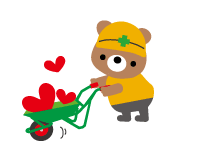

-------------------------------

# MEMO

文章を書くことは、成功するための重要なスキルです。しかし、全米教育進歩調査によると、高校3年生の3分の1以下しか文章を書くことができません。残念ながら、低所得者、黒人、ヒスパニックの生徒の成績はさらに悪く、文章を書く能力があるのは15％未満です。生徒が文章を上達させるための1つの方法は、生徒の文章を評価し、個人に合わせたフィードバックを提供する自動フィードバックツールによるものです。

現在、自動ライティング・フィードバックツールは数多く存在しますが、どれも限界があります。多くのツールは、論文や主張の裏付けなどの文章構造を特定できなかったり、特定が不十分だったりすることがあります。さらに、利用可能なツールの大半は、独自に裏付けできないアルゴリズムや機能主張を持っています。さらに重要なことは、これらのライティングツールの多くは、コストがかかるため、教育関係者がアクセスできないことです。この問題は、有色人種や低所得層の生徒が多く、十分なサービスを提供されていない学校では、さらに深刻です。つまり、自動ライティングフィードバックの分野は、教育の民主化につながるイノベーションの機が熟しているのです。

ジョージア州立大学（GSU）はアトランタにある都市型公立研究機関で、学部と大学院を有しています。U.S. News & World Report誌は、GSUを全米で最も革新的な大学のひとつに位置づけています。GSUは、アフリカ系アメリカ人に授与する学士号の数が、国内の他のどの非営利大学よりも多くなっています。GSUとアリゾナ州に拠点を置く独立非営利団体The Learning Agency Labは、社会的利益を目的とした学習ベースのツールやプログラムを科学的に開発することに注力しています。

<u>このコンペティションでは、学生の文章に含まれる要素を特定します。具体的には、6年生から12年生の生徒が書いたエッセイのテキストを自動的に分割し、論証的・修辞的要素を分類していただきます。</u>データサイエンスの分野で急成長している自然言語処理のスキルを試すために、これまでに公開された学生の作文に関する最大のデータセットにアクセスすることができます。

成功すれば、生徒が自分の書いた文章に対するフィードバックを受けやすくなり、文章の成果を向上させる機会が増えます。バーチャルライティングチューターや自動ライティングシステムはこれらのアルゴリズムを活用でき、教師は採点時間の短縮に利用することができます。あなたが開発したオープンソースのアルゴリズムは、どのような教育機関でも若い作家の成長をより良く支援することができるようになります。
